In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [6]:
from sklearn.naive_bayes import MultinomialNB

In [7]:
from sklearn.multiclass import OneVsRestClassifier

In [8]:
from sklearn import metrics

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
from pandas.plotting import scatter_matrix

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn import metrics

In [13]:
resumeDataSet = pd.read_csv('resume_dataset.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [14]:
print ("Displaying the distinct categories of resume -")
print (resumeDataSet['Category'].unique())


Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [15]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Category
Java Developer               14
Database                     11
HR                           11
Data Science                 10
Advocate                     10
DotNet Developer              7
Hadoop                        7
DevOps Engineer               7
Automation Testing            7
Testing                       7
Civil Engineer                6
Business Analyst              6
SAP Developer                 6
Health and fitness            6
Python Developer              6
Arts                          6
Electrical Engineering        5
Sales                         5
Network Security Engineer     5
Mechanical Engineer           5
Web Designing                 5
ETL Developer                 5
Blockchain                    5
Operations Manager            4
PMO                           3
Name: count, dtype: int64


In [16]:
import seaborn as sns

<Axes: xlabel='count', ylabel='Category'>

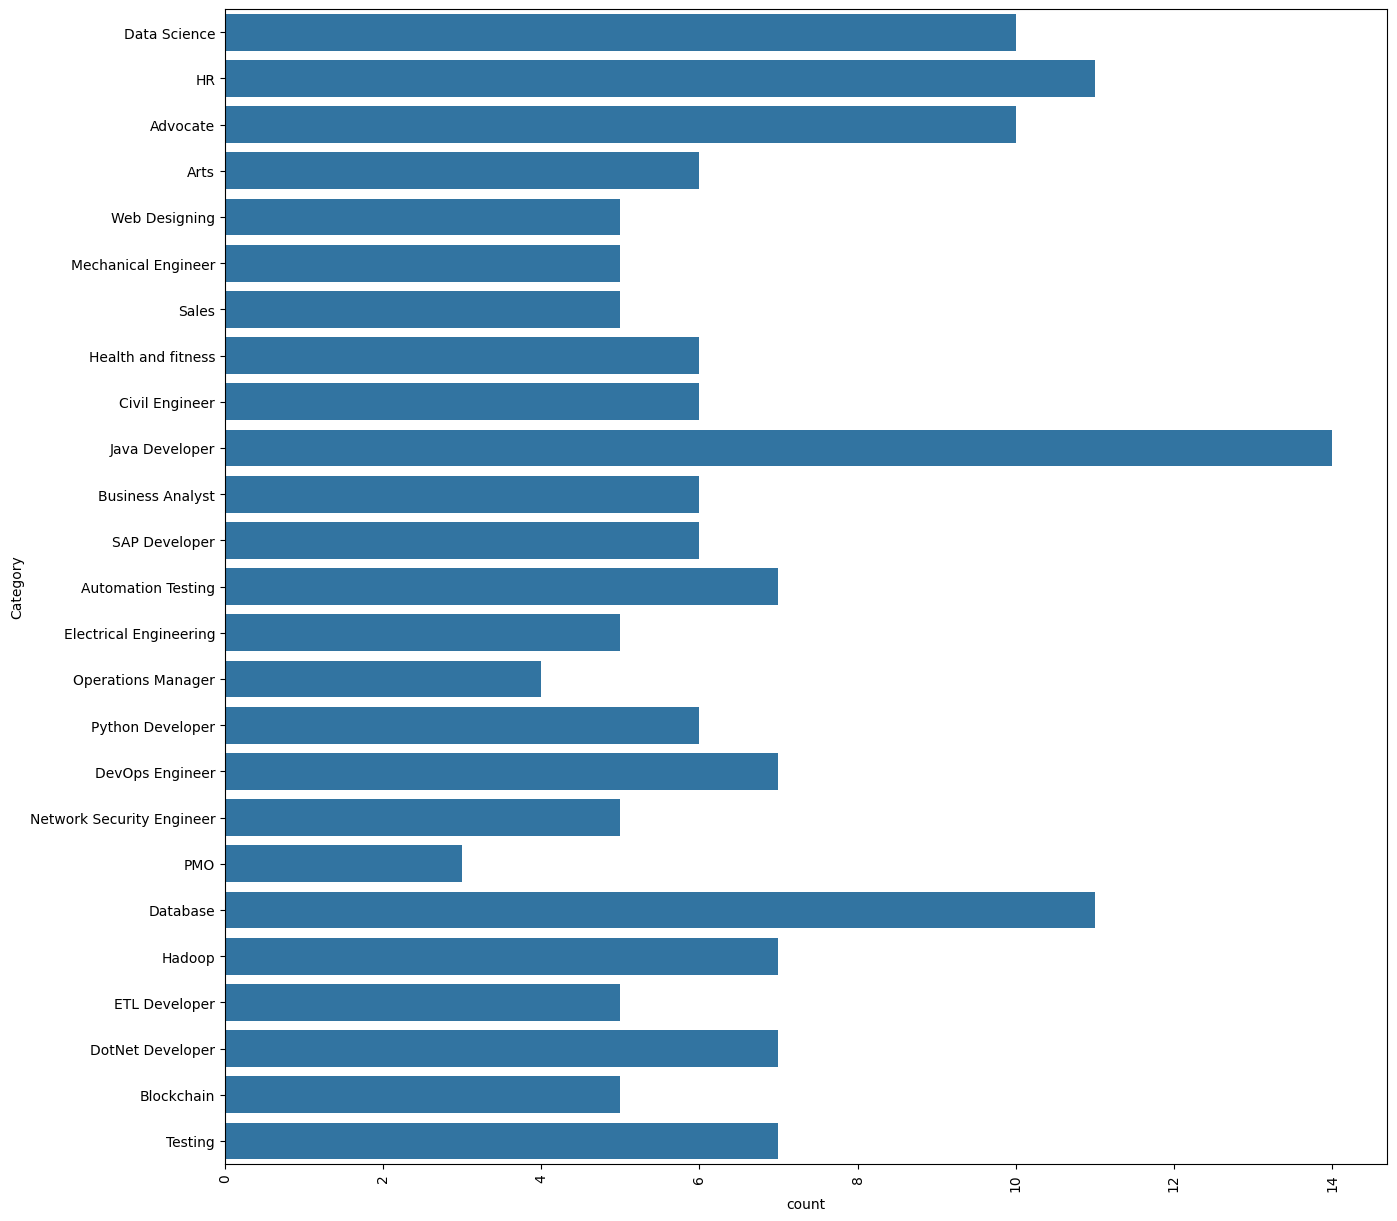

In [17]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)

In [18]:
from matplotlib.gridspec import GridSpec

In [11]:
import tkinter as tk
import csv
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import pandas as pd

class ResumeScreeningWindow:
    def __init__(self, master):
        self.master = master
        master.title("Resume Screening")
        master.geometry("1000x700")
        master.configure(bg="#f0f0f5")

        # Top Navbar Frame
        self.navbar_frame = tk.Frame(master, bg="#2c3e50", height=60)
        self.navbar_frame.pack(side=tk.TOP, fill=tk.X)

        # Branding and Logo
        self.logo = tk.Label(self.navbar_frame, text="Re-Screen", font=("Helvetica", 16, "bold"), bg="#2c3e50", fg="#ecf0f1")
        self.logo.pack(side=tk.LEFT, padx=20, pady=10)

        # Search Entry
        self.search_entry = tk.Entry(self.navbar_frame, width=40, font=("Helvetica", 14), bd=0, relief=tk.FLAT)
        self.search_entry.pack(side=tk.LEFT, padx=10, pady=10)

        # Search Button
        self.search_button = tk.Button(self.navbar_frame, text="Search", font=("Helvetica", 12, "bold"), command=self.search_resumes, bg="#2980b9", fg="#ecf0f1", bd=0, relief=tk.FLAT)
        self.search_button.pack(side=tk.LEFT, padx=10)

        # Back Button
        self.back_button = tk.Button(self.navbar_frame, text="Back", font=("Helvetica", 12, "bold"), command=self.go_back, bg="#2980b9", fg="#ecf0f1", bd=0, relief=tk.FLAT)
        self.back_button.pack(side=tk.RIGHT, padx=20)

        # Left Frame for Categories/Resumes
        self.left_frame = tk.Frame(master, width=250, bg="#34495e")
        self.left_frame.pack(side=tk.LEFT, fill=tk.Y)

        # Resume Listbox
        self.resume_listbox = tk.Listbox(self.left_frame, width=30, height=30, bg="#ecf0f1", font=("Helvetica", 12), bd=0, selectmode=tk.SINGLE)
        self.resume_listbox.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)
        self.resume_listbox.bind('<<ListboxSelect>>', self.display_selected_resume)

        # Center Frame for Text Display
        self.center_frame = tk.Frame(master, width=600, bg="#ffffff")
        self.center_frame.pack(side=tk.LEFT, fill=tk.BOTH, expand=True, padx=10, pady=10)

        # Resume Display Area
        self.target_resume_text = tk.Text(self.center_frame, wrap=tk.WORD, font=("Helvetica", 12), bg="#ffffff", bd=1, relief=tk.SUNKEN)
        self.target_resume_text.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

        # Placeholder for Pie Chart or Additional Features
        self.pie_chart_frame = tk.Frame(self.center_frame, bg="#ffffff")
        self.pie_chart_frame.pack(side=tk.TOP, fill=tk.X, pady=10)

        # Rest of your code...
        self.show_category_distribution()
     # Load resumes from CSV
        self.resume_dict = self.load_resumes_from_csv('resume_dataset.csv')
        self.update_category_listbox()

        # Set default text in search entry
        self.search_entry.insert(tk.END, "Search resumes...")

        # Bind Enter key to the search function
        self.master.bind('<Return>', self.search_resumes_event)

    def load_resumes_from_csv(self, file_path):
        resume_dict = {}
        try:
            with open(file_path, mode='r', newline='', encoding='utf-8') as file:
                reader = csv.reader(file)
                next(reader)  # Skip header if there is one
                for row in reader:
                    if row:  # Check if the row is not empty
                        resume_name = row[0]
                        resume_text = '\n'.join(row[1:])
                        category = row[2] if len(row) > 2 else 'Uncategorized'
                        if category not in resume_dict:
                            resume_dict[category] = []
                        resume_dict[category].append((resume_name, resume_text))
        except FileNotFoundError:
            print(f"File {file_path} not found.")
        except Exception as e:
            print(f"An error occurred: {e}")
        return resume_dict

    def update_category_listbox(self):
        self.current_view = 'categories'
        self.resume_listbox.delete(0, tk.END)
        for category in self.resume_dict:
            self.resume_listbox.insert(tk.END, category)

    def update_resume_listbox(self, selected_category):
        self.current_view = 'resumes'
        self.resume_listbox.delete(0, tk.END)
        for i, (resume_name, _) in enumerate(self.resume_dict.get(selected_category, []), start=1):
            self.resume_listbox.insert(tk.END, f"{i}. {resume_name}")

    def on_listbox_select(self, event):
        if self.current_view == 'categories':
            self.display_category_resumes(event)
        elif self.current_view == 'resumes':
            self.display_selected_resume(event)

    def display_category_resumes(self, event):
        selected_index = self.resume_listbox.curselection()
        if not selected_index:
            return
        selected_category = self.resume_listbox.get(selected_index[0])
        self.update_resume_listbox(selected_category)

    def search_resumes(self):
        # Get search keyword
        keyword = self.search_entry.get().lower()

        # Filter resumes based on keyword
        filtered_resumes = []
        for category, resumes in self.resume_dict.items():
            for resume_name, resume_text in resumes:
                if keyword in resume_name.lower() or keyword in resume_text.lower():
                    filtered_resumes.append((resume_name, resume_text, category))

        # Clear and update resume listbox
        self.current_view = 'resumes'
        self.resume_listbox.delete(0, tk.END)
        for resume_name, _, category in filtered_resumes:
            self.resume_listbox.insert(tk.END, f"{resume_name} ({category})")

        # Update the text area with the selected resume
        self.target_resume_text.delete(1.0, tk.END)
        if filtered_resumes:
            self.target_resume_text.insert(tk.END, filtered_resumes[0][1])

        # Update the pie chart
        self.update_category_distribution()

    def search_resumes_event(self, event):
        self.search_resumes()

    def show_category_distribution(self):
        # Create a new figure and axis
        fig = plt.Figure(figsize=(5, 4), dpi=100)
        ax = fig.add_subplot(111)

        # Create the pie chart
        resumeDataSet = pd.read_csv('resume_dataset.csv')
        targetCounts = resumeDataSet['Category'].value_counts()
        targetLabels = resumeDataSet['Category'].unique()
        cmap = plt.get_cmap('coolwarm')
        colors = [cmap(i) for i in np.linspace(0, 1, len(targetLabels))]
        ax.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
        ax.set_title('CATEGORY DISTRIBUTION')

        # Create a Tkinter canvas to display the chart
        canvas = FigureCanvasTkAgg(fig, master=self.pie_chart_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True, anchor=tk.CENTER)

    def update_category_distribution(self):
        # Clear the pie chart frame
        for widget in self.pie_chart_frame.winfo_children():
            widget.destroy()

        # Show the new pie chart
        self.show_category_distribution()

    def display_selected_resume(self, event):
        selected_index = self.resume_listbox.curselection()
        if not selected_index:
            return
        
        selected_text = self.resume_listbox.get(selected_index[0])

        # Determine if the text includes category information
        if ' (' in selected_text:
            # Extract resume name and category
            selected_resume_name, selected_category = selected_text.rsplit(' (', 1)
            selected_category = selected_category.rstrip(')')  # Remove trailing ')'
        else:
            # No category information, assume it's just the resume name
            selected_resume_name = selected_text
            selected_category = None

        # Find and display the selected resume
        if selected_category:
            resumes = self.resume_dict.get(selected_category, [])
            for resume_name, resume_text in resumes:
                if resume_name == selected_resume_name:
                    self.target_resume_text.delete(1.0, tk.END)
                    self.target_resume_text.insert(tk.END, resume_text)
                    return
        else:
            # Handle case where there is no category (e.g., when searching)
            for category, resumes in self.resume_dict.items():
                for resume_name, resume_text in resumes:
                    if resume_name == selected_resume_name:
                        self.target_resume_text.delete(1.0, tk.END)
                        self.target_resume_text.insert(tk.END, resume_text)
                        return

    def go_back(self):
        # Reset the listbox to show categories
        self.update_category_listbox()

        # Clear the text area
        self.target_resume_text.delete(1.0, tk.END)
        self.target_resume_text.insert(tk.END, "Select a category to view resumes.")


root = tk.Tk()
my_window = ResumeScreeningWindow(root)
root.mainloop()


In [20]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [21]:
import nltk
nltk.download('punkt', force=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Atharva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

[('Exprience', 601), ('months', 499), ('company', 496), ('Details', 490), ('description', 436), ('1', 345), ('Project', 288), ('data', 243), ('project', 234), ('year', 218), ('SQL', 212), ('6', 209), ('Maharashtra', 205), ('team', 203), ('Less', 203), ('using', 195), ('January', 173), ('Management', 160), ('Pune', 147), ('C', 142), ('Education', 136), ('Ltd', 136), ('management', 135), ('database', 132), ('Data', 125), ('monthsCompany', 121), ('Engineering', 121), ('Server', 121), ('Database', 117), ('India', 117), ('like', 117), ('The', 116), ('various', 115), ('Pvt', 115), ('business', 114), ('application', 114), ('Responsibilities', 113), ('development', 112), ('System', 110), ('reports', 109), ('2', 109), ('A', 108), ('Java', 106), ('issues', 104), ('requirements', 104), ('Mumbai', 101), ('work', 98), ('system', 96), ('Role', 96), ('Test', 96)]


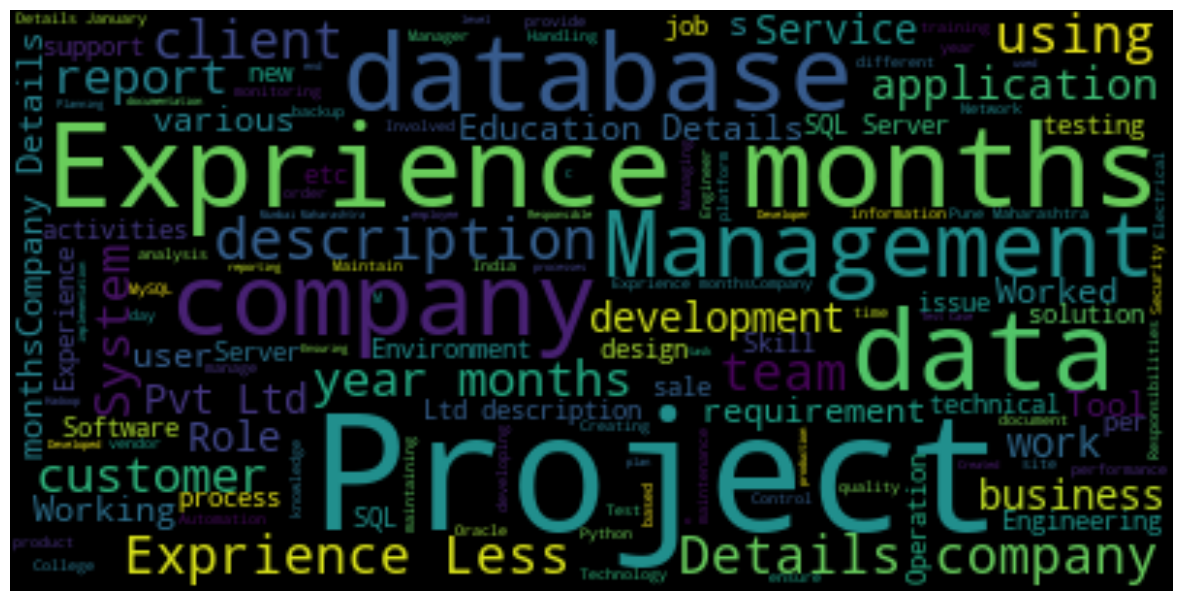

In [22]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud


oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)
requiredWords = nltk.word_tokenize(cleanedText)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(135, 1500)
(34, 1500)


In [25]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.88
Accuracy of KNeighbors Classifier on test set: 0.79

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         4
          11       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      0.50      0.